Грибков Данил, 313 группа


# Постановка задачи. Задача $№ 1$.
Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:

\begin{eqnarray}
 \begin{cases}
   \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0, ~~0 < x \leq 1
   \\
   u(x, 0) = \frac{4}{\pi} arctg(x-2)+2
   \\
   u(0, t) = (2 - \frac{4}{\pi} arctg(2)) e^{-t}
 \end{cases}
\end{eqnarray}

# Исследование характеристик
Уравнение характеристик для данного уравнения будет иметь вид:
\begin{eqnarray}
    \frac{dt}{1} = \frac{dx}{u} = \frac{du}{0} \Longrightarrow u = u^{*} = const  \Longrightarrow t - t^{*} = \frac{x - x^{*}}{u^{*}}
\end{eqnarray}
НУ и ГУ:
\begin{equation}
    1) t^{*} = 0 \Longrightarrow t = (x - x^{*})\frac{1}{u^{*}} = \frac{x - x^{*}}{\frac{4}{\pi} arctg(x^{*}-2)+2}
    \\
    2) x^{*} = 0 \Longrightarrow t = t^{*} + \frac{x}{u^{*}} = t^{*} +\frac{x}{(2 - {\frac{4}{\pi} arctg(2)) e^{-t^{*}}}}
\end{equation}
В точках пересечения характеристик решение будет разрывным. Построим уравнения характеристик и узнаем, есть ли где-то пересечения.

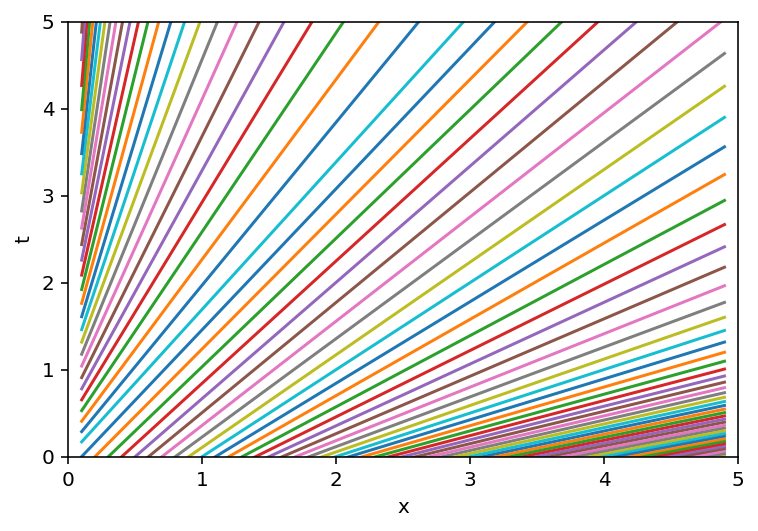

In [7]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def a1(x):
    return [((x-x0)/(4/pi*np.arctan(x0 - 2)+2)) for x0 in np.arange(0.1,10,0.1)]
def a2(x):
    return [(t0 + x*exp(t0)/(2-4/pi*np.arctan(2))) for t0 in np.arange(0,10,0.1)]         
Xarrange = np.arange(0.1,5,0.1)
t1arrange = [a1(x) for x in Xarrange]
t2arrange = [a2(x) for x in Xarrange]
%matplotlib inline
plt.plot(Xarrange, t1arrange, Xarrange, t2arrange) 
plt.ylim(0,5)
plt.xlim(0,5)
plt.xlabel('x')
plt.ylabel('t')
plt.show()    

Как видим, в области $0 < x  \leq 1$  пересечений нет. Следовательно, нет так называемого опрокидывания волны, и во всей области решение будет представимо через разностную схему. 

# Аналитическое решение
Мы получили два семейства характеристик. Получим аналитическое (численно) решение задачи, составив и численно решив два неявных уравнения относительно $u^{*}$:
\begin{eqnarray}
 \begin{cases}
   \ln{u^{*}} + t - \ln{(2 - \frac{4}{\pi} arctg(2))} = \frac{x}{u*} ~~ t > -\frac{x}{2 - \frac{4}{\pi} arctg(2)}
   \\
   tu^{*} = 2 - x + tg{(\frac{\pi}{4}(2 - u^{*}))} ~~ t \leq -\frac{x}{2 - \frac{4}{\pi} arctg(2)}
 \end{cases}
 \\
 2 - \frac{4}{\pi} arctg(2) \approx 0.59
\end{eqnarray}
## Библиотеки
Для построения численного и аналитического решения нам понадобятся следующие библиотеки:

In [8]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import animation
import plotly
import plotly.graph_objs as go
import warnings

from IPython.display import clear_output, HTML, display

## Сетка
Введем в области $\Omega = \{(x, t ): 0 < x \leq 1, ~~0 < t < T \}$ сетку с шагом $h$ по $x$ и с шагом $\tau$ по $t$: 
\begin{eqnarray}
 \omega_{h, ~ \tau}=\begin{cases}
x_n=n\cdot h, ~~h=\frac{1}{N}, ~~n=\overline{0, N}\\
t_m=m\cdot \tau, ~~\tau=\frac{1}{M}, ~~m=\overline{0, M}
\end{cases}
\end{eqnarray}
Имеем сеточную функцию $y^m_{n}=u(x_n,t_m)$

## Настройки
Введем различные параметры, необходимые для численного решения:

In [78]:
epsilon = 0.00001 # точность в методе Ньютона
N = 100; M = 100 # количество шагов по x и t соответственно
T_begin = 0; T_end = 5 # границы по x и t
X_begin = 0; X_end = 1
h = (X_end - X_begin)/(N-1)
tau = (T_end - T_begin)/(M-1)

Определим функцию, которая будет строить графики:

In [79]:
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)
X, T = np.meshgrid(xn, tm)
def plot_u(X1, T1, y1, filename='/Users/admin/Desktop', online=True):

        X0 = X1
        T0 = T1
        u = y1
        data = [go.Surface(x = X0, y = T0, z = u, colorscale = 'YlGnBu')]
        layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(200, 200, 230)"),
                        
                    yaxis = dict(
                        title='t',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(230, 200,230)"),
                        
                    zaxis = dict(
                        title='u(x, t)',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(230, 230,200)",),),
                    width=800, height=600, 
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )

        fig = go.Figure(data = data, layout = layout)
        if  online:
            return plotly.offline.iplot(fig, filename = filename)

## Код, строящий аналитическое решение

In [144]:
# создаем массив размером (M x N) из начальных приближений
y0 = np.ones((M,N))*0.01 
for n in np.arange(N):
        y0[0][n] = 2 + (4/np.pi)*np.arctan(h*n - 2)

for m in np.arange(M):
        y0[m][0] = (2 - (4/np.pi)*np.arctan(2))*exp(-tau * m)
def F1(m, k):
    return np.log(y0[m][k]) + tau*m - np.log(0.59) - h*k/y0[m][k]
def dF1(m, k):
    return 1/y0[m][k] + h*k/(y0[m][k])**2
def F2(m, k):
    return tau*m*y0[m][k] - 2 + h*k - np.tan((np.pi/4)*(2 - y0[m][k] ))
def dF2(m, k):
    return tau*m - np.pi/(4*(np.cos((np.pi/4)*(2 - y0[m][k])))**2)

# метод Ньютона 
eps = epsilon + 1
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[1:M]:
        for n in np.arange(N)[1:N]:
            r0 = y0[m][n]
            if tau*m >= h*n/0.59:
                k = F1(m, n) / dF1( m, n)
                y0[m][n] = y0[m][n] - k
            else:
                k = F2(m, n) / dF2( m, n)
                y0[m][n] = y0[m][n] - k
            if abs(k) > eps:
                eps = abs(k)
plot_u(X,T,y0)

# Численное решение


## Шаблон
Перепишем исходное уравненение в дивергентном виде:
\begin{eqnarray}
\frac{\partial u}{\partial t} + \frac{\partial }{\partial x}\frac{u^2}{2} = 0
\end{eqnarray}
Воспользуемся шаблоном следующего вида ("ящик"):

![alt text](Box.png "Title")

Он безусловно устойчив и аппроксимирует задачу как $O(h^2+\tau^2)$. Разностная схема будет выглядить следующим образом:

\begin{eqnarray}
\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{\tau} +\frac{(y^{m+1}_{n+1})^2 - (y^{m+1}_{n})^2 + (y^{m}_{n+1})^2 - (y^{m}_{n})^2}{2h}=0 ~~(*)
\end{eqnarray}

НУ и ГУ:

\begin{aligned} 
   y^0_n =  \frac{4}{\pi} arctg(nh-2) + 2
   \\
   y^j_0 = (2 - \frac{4}{\pi} arctg(2)) e^{-j\tau}
\end{aligned}


## Аппроксимация и устойчивость
### Устойчивость
Зафиксируем коэффициент перед $\frac{\partial u}{\partial x}$. Выберем произвольную точку $(x_0,t_0)$ исследуемой обасти $\Omega$ и обозначим $u(x_0, t_0)$  за $С$. Теперь исследуемая схема приобретет вид:
\begin{eqnarray}
\frac{y^{m+1}_{n+1}-y^{m}_{n+1}+y^{m+1}_{n}-y^{m}_{n}}{\tau}+C\frac{y^{m+1}_{n+1}-y^{m+1}_{n}+y^{m}_{n+1}-y^{m}_{n}}{h}=0
\end{eqnarray}
Ищем решение в виде $y^{j}_{n}=q^j e^{i\alpha n}$:
\begin{eqnarray}
\frac{y^{j+1}_{n+1} - y^{j}_{n+1}}{\tau} + C \frac{{y^{j+1}_{n+1}} - {y^{j+1}_{n}}}{h} = 0
\end{eqnarray}
Выразим отсюда q:
\begin{eqnarray}
q = \frac{e^{i\alpha} + 1 + r(1 - e^{i\alpha})}{e^{i\alpha} + 1 + r(e^{i\alpha} -1)}, где ~r = \frac{C\tau}{h}
\end{eqnarray}
$|q| \leq 1$ для любых $C, \tau $ и $h$, следовательно выполнен спектральный критерий Неймана для любого размера сетки.
### Порядок аппроксимации
Вычислим порядок аппроксимации данной схемы, разложив сначала каждую точку шаблона в ряд Тейлора до третьего члена включительно в точке $(x_n+h/2,t_m+\tau/2)$:
\begin{aligned}
y^{m+1} = y^{m+0.5}+\frac{\tau}{2}y'~^{m+0.5} + \frac{1}{2}\frac{\tau^{2}}{4} y''~^{m+0.5}+\frac{1}{6}\frac{\tau^{3}}{8}y'''~^{m+0.5} + O(\tau^{4})\\
y^{m} = y^{m+0.5}-\frac{\tau}{2}y'~^{m+0.5}+\frac{1}{2}\frac{\tau^{2}}{4} y''~^{m+0.5}-\frac{1}{6}\frac{\tau^{3}}{8}y'''~^{m+0.5} + O(\tau^{4})\\
y_{n+1} = y_{n+0.5}+\frac{h}{2}y'_{n+0.5}+\frac{1}{2}\frac{h^{2}}{4} y''_{n+0.5}+\frac{1}{6}\frac{h^{3}}{8}y'''_{n+0.5} + O(h^{4})\\
y_{n} = y_{n+0.5}-\frac{h}{2}y'_{n+0.5}+\frac{1}{2}\frac{h^{2}}{4} y''_{n+0.5}-\frac{1}{6}\frac{h^{3}}{8}y'''_{n+0.5} + O(h^{4})
\end{aligned}
Следовательно:
\begin{aligned}
\frac{y^{m+1}_{n+1}-y^{m}_{n+1}+y^{m+1}_n-y^{m}_n}{2\tau} +C\frac{y^{m+1}_{n+1}-y^{m+1}_{n}+y^{m}_{n+1}-y^{m}_{n}}{2h} -\frac{\partial y}{\partial t} -C\frac{\partial y}{\partial x}=O(\tau^{2} + h^{2}) \end{aligned}

## Схема бегущего счета
Будем решать задачу с помощью схемы бегущего счета. Из разностной схемы видно, что неизвестную сеточную функцию $y^{j+1}_{n+1}$ можно найти численно, решив уравнение (*) относительно этой функции, так как нам известны массивы $y^0_n$ и $y^j_0$. Таким образом, мы найдем значения сеточной функции на всей области определения, заполняя двумерный массив по горизонтали снизу вверх: находим сначала $y^1_1$, потом $y^1_2$ и т. д. вплоть до $y^1_n$; далее $y^2_1$ и т. д.

Будем решать уравнение с помощью метода Ньютона. Будем приближенно искать корень корень уравнения (*) - $y^{j+1}_{n+1}$.
# Код, строящий численное решение

In [113]:
y = np.ones((M,N)) 

for n in np.arange(N):
        y[0][n] = (2 + (4/np.pi)*np.arctan(h*n - 2))

for m in np.arange(M):
        y[m][0] = (2 - (4/np.pi)*np.arctan(2))*exp(-tau * m)
        
def F(mp1, np1):
    n = np1-1
    m = mp1-1
    return (y[mp1][n]- y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*tau) + (y[mp1][np1]**2-y[mp1][n]**2 + y[m][np1]**2-y[m][n]**2) / (4.*h)

def dF(m, k):
    return  1/(2*tau) + y[m][k]/(2*h)

# метод Ньютона
eps = epsilon + 1
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            k = F(m+1, n+1) / dF( m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - k
            if abs(k) > eps:
                eps = abs(k)


plot_u(X,T,y)

# Погрешность
Зная аналитическое решение (хотя оно то же как бы численное), можно вычислить погрешность численного решения:
\begin{eqnarray}
|z_{h,\tau}(x_n, t_j)| = |y(x_n, t_j) - y_0(x_n, t_j)|
\end{eqnarray}
Построим график зависмости погрешности от x и t и вычислим среднее значение и максимум погрешности в заданных областях x и t:

In [147]:
S = np.zeros((M,N))
S = np.abs(y0 - y)
plot_u(X,T,S)
print("Максимальное значение погрешности:", np.max(S), "\nСреднее значение погрешности:", np.mean(S))

Максимальное значение погрешности: 0.9695273110952833 
Среднее значение погрешности: 0.11161223244385188


# Сгущение сетки
